In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install kmodes

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install folium matplotlib
import folium
!pip install geopy
from geopy.geocoders import Nominatim

In [7]:
m = folium.Map(zoom_start = 6)

existing_dcs = [
    {'latitude': 35.393528, 'longitude': - 119.043732, 'name': 'Bakersfield, CA'},
    {'latitude': 38.2805, 'longitude': -104.4672, 'name': 'Pueblo, CO'},
    {'latitude': 44.979595, 'longitude': -93.276566, 'name': 'Woodbury, MN'},
    {'latitude': 40.028900, 'longitude': -77.590698, 'name': 'Chambersberg, PN'}
]

for location in existing_dcs:
    new_marker = folium.Marker(
        location=[location['latitude'], location['longitude']],
        popup=location['name'],
        icon=folium.Icon(color='red')
    )

    new_marker.add_to(m)

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Target Upcurve/Project/DC_Planning.csv')

In [9]:
df['latitude'] = df['geographic_loc'].str.extract(r'\((.*?),')[0].astype(float)
df['longitude'] = df['geographic_loc'].str.extract(r',(.*)\)', expand=False).astype(float)
df.head(5)

,guest_id,geographic_loc,order_frequency,avg_order_value,Electronics,Clothing,Home Appliances,Books,Beauty,returns_rate,guest_segmentation,shipping_preferences,promotional_response,state,country,latitude,longitude
0,G50029,"(41.9345228822601,-114.793454289252)",12.528133,9.092696,1,0,0,0,1,0.091774,Lapsed,Express,Medium,Nevada,United States,41.934523,-114.793454
1,G39532,"(28.4114060271366,-98.0530295882411)",17.571661,18.851202,1,1,0,0,0,0.300096,Repeat,Express,Low,Texas,United States,28.411406,-98.053030
2,G93168,"(37.8619825697659,-79.3247968858362)",9.699606,47.468598,1,1,0,0,1,0.580670,Lapsed,Express,Low,Virginia,United States,37.861983,-79.324797
3,G34201,"(33.1011843427186,-115.570115912097)",3.407187,10.747374,0,0,1,0,1,0.526972,New,Same-day,Medium,California,United States,33.101184,-115.570116
4,G69749,"(49.0223887139561,-123.155574774425)",14.276042,3.441740,1,1,1,0,0,0.562618,Repeat,Express,Low,British Columbia,Canada,49.022389,-123.155575


In [10]:
df2 = df.drop(['guest_id','country','geographic_loc','state'],axis =1)

In [11]:
df2.head(5)

,order_frequency,avg_order_value,Electronics,Clothing,Home Appliances,Books,Beauty,returns_rate,guest_segmentation,shipping_preferences,promotional_response,latitude,longitude
0,12.528133,9.092696,1,0,0,0,1,0.091774,Lapsed,Express,Medium,41.934523,-114.793454
1,17.571661,18.851202,1,1,0,0,0,0.300096,Repeat,Express,Low,28.411406,-98.053030
2,9.699606,47.468598,1,1,0,0,1,0.580670,Lapsed,Express,Low,37.861983,-79.324797
3,3.407187,10.747374,0,0,1,0,1,0.526972,New,Same-day,Medium,33.101184,-115.570116
4,14.276042,3.441740,1,1,1,0,0,0.562618,Repeat,Express,Low,49.022389,-123.155575


In [12]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder

numerical_cols = ['order_frequency','returns_rate']
# scaler = StandardScaler()
# df2[numerical_cols] = scaler.fit_transform(df2[numerical_cols])


In [13]:
categorical_cols = ['shipping_preferences','promotional_response']
# encoder = LabelEncoder()
# df2[categorical_cols] = encoder.fit_transform(df2[categorical_cols])
encoder = OrdinalEncoder()
df2[categorical_cols] = encoder.fit_transform(df2[categorical_cols])


In [14]:
# df2[categorical_cols]

In [15]:
combined_features = numerical_cols + categorical_cols
combined_features

['order_frequency',
 'returns_rate',
 'shipping_preferences',
 'promotional_response']

In [16]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 9411, ncost: 3276389.3290823298
Run: 1, iteration: 2/100, moves: 4354, ncost: 3175870.009419031
Run: 1, iteration: 3/100, moves: 1275, ncost: 3169028.142060999
Run: 1, iteration: 4/100, moves: 415, ncost: 3167719.5406413367
Run: 1, iteration: 5/100, moves: 462, ncost: 3164448.431674708
Run: 1, iteration: 6/100, moves: 835, ncost: 3153161.914708754
Run: 1, iteration: 7/100, moves: 1144, ncost: 3138578.7973592095
Run: 1, iteration: 8/100, moves: 1049, ncost: 3129988.9485768196
Run: 1, iteration: 9/100, moves: 686, ncost: 3126626.255991095
Run: 1, iteration: 10/100, moves: 461, ncost: 3125132.538795619
Run: 1, iteration: 11/100, moves: 282, ncost: 3124594.10929494
Run: 1, iteration: 12/100, moves: 170, ncost: 3124417.858459985
Run: 1, iteration: 13/100, moves: 112, ncost: 3124336.498357673
Run: 1, itera

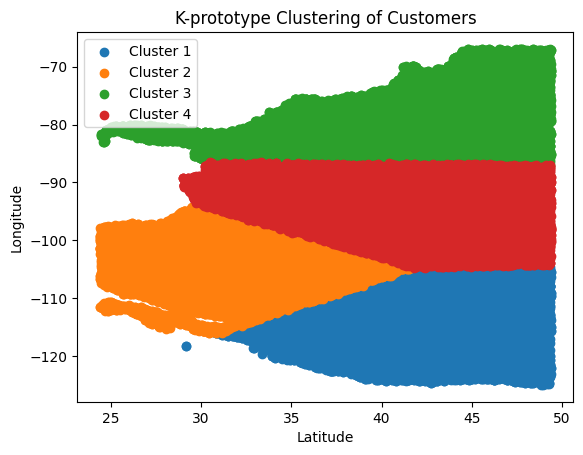

In [17]:
selected_features3 = ['latitude','longitude','order_frequency','returns_rate','shipping_preferences','promotional_response']
k = 4
kproto = KPrototypes(n_clusters=k,verbose = 1)
clusters = kproto.fit_predict(df2[selected_features3].values, categorical=[4,5])

#scatterplot
df2['cluster3'] = clusters
for cluster_num in range(k):
  cluster_data = df2[df2['cluster3'] == cluster_num]
  plt.scatter(cluster_data['latitude'], cluster_data['longitude'], label=f'Cluster {cluster_num + 1}')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('K-prototype Clustering of Customers')
plt.legend()
plt.show()

In [18]:
cluster_centroids = kproto.cluster_centroids_
cluster_centroids

array([[  42.17705192, -114.94575869,   10.01646869,    0.28615939,
           2.        ,    0.        ],
       [  31.49927954, -104.62835911,   10.00628888,    0.28968423,
           0.        ,    1.        ],
       [  41.1344314 ,  -79.31996632,    9.99345995,    0.28734418,
           2.        ,    0.        ],
       [  40.82262544,  -94.43708313,   10.02170965,    0.28657076,
           1.        ,    1.        ]])

In [22]:
cluster_centroids = kproto.cluster_centroids_
for cluster_id, (lat, lon, order_freq, returns_rate, shipping_pref, promo_resp) in enumerate(cluster_centroids):
    print(f"Cluster {cluster_id} Centroid:")
    print(f"Latitude: {lat}")
    print(f"Longitude: {lon}")
    print(f"Order Frequency: {order_freq}")
    print(f"Returns Rate: {returns_rate}")
    print(f"Shipping Preferences: {shipping_pref}")
    print(f"Promotional Response: {promo_resp}")
    print("\n")

Cluster 0 Centroid:
Latitude: 42.177051923100855
Longitude: -114.94575868728953
Order Frequency: 10.016468690136845
Returns Rate: 0.2861593886125636
Shipping Preferences: 2.0
Promotional Response: 0.0


Cluster 1 Centroid:
Latitude: 31.49927954420469
Longitude: -104.62835910929554
Order Frequency: 10.006288875213476
Returns Rate: 0.2896842340273143
Shipping Preferences: 0.0
Promotional Response: 1.0


Cluster 2 Centroid:
Latitude: 41.13443140295636
Longitude: -79.31996632134131
Order Frequency: 9.993459951431056
Returns Rate: 0.28734418005972495
Shipping Preferences: 2.0
Promotional Response: 0.0


Cluster 3 Centroid:
Latitude: 40.82262543702477
Longitude: -94.43708312998348
Order Frequency: 10.021709647727448
Returns Rate: 0.2865707581365526
Shipping Preferences: 1.0
Promotional Response: 1.0




In [23]:
#map
# m = folium.Map(zoom_start = 6)
for i in range(k):
  coordinates = [cluster_centroids[i][0],cluster_centroids[i][1]]

  folium.Marker(
      location = coordinates,
      icon = folium.Icon(color = 'blue'),
      popup = f"{i}"
  ).add_to(m)

  m

In [24]:
m